## Day 22 Lecture 2 Assignment

In this assignment, we will do apply the feature engineering techniques we have learned to create new features from existing ones. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


We will start with the FIFA soccer ratings dataset. From our EDA in the previous exercise, we saw that most ratings appeared to be somewhat normally distributed, occasionally with long tails. Choose one of the ratings (we will choose Curve) and apply the following transformations:

- Log transformation
- Standardization
- Quantile transformation

Plot the resulting histograms. How do these transformations affect the resulting distributions?

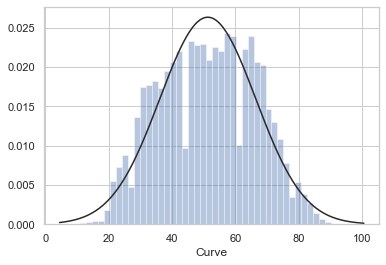

This is the og distribution


In [4]:
# answer goes here
from scipy.stats import norm

sns.distplot(soccer_data['Curve'], kde=False, fit=norm)
plt.show()
print('This is the og distribution')

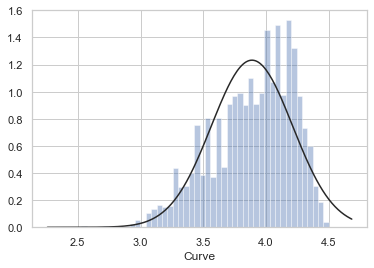

This evens out the two major trophs, but it skews the distribution left, making it less normal


In [5]:
# Apply the log transformation

log_curve = np.log(soccer_data['Curve'])

sns.distplot(log_curve, kde=False, fit=norm)
plt.show()
print('This evens out the two major trophs, but it skews the distribution left, making it less normal')

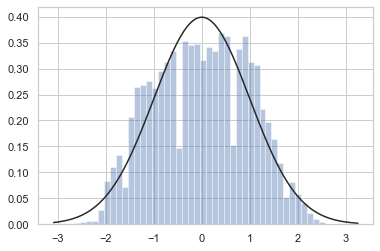

The distribution appears exactly the same, but with a new scale. Seems to have a mean of 0 and std dev of 1


In [6]:
# Apply the Standardization transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_curve = scaler.fit_transform(soccer_data[['Curve']])

sns.distplot(scaler_curve, kde=False, fit=norm)
plt.show()
print('The distribution appears exactly the same, but with a new scale. Seems to have a mean of 0 and std dev of 1')

*Slaps roof of distribution* This bad boi can fit so much normal in there! 


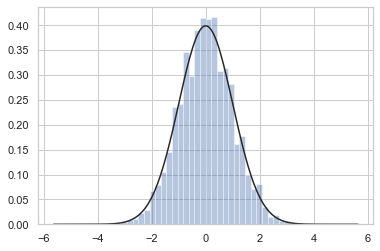

In [7]:
# Apply the Quantile transformation
from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='normal')

quantile_curve = quantile.fit_transform(soccer_data[['Curve']])

sns.distplot(quantile_curve, kde=False, fit=norm)
print('*Slaps roof of distribution* This bad boi can fit so much normal in there! ')

Next, we will switch our focus to the Chicago traffic crashes dataset. We will create several new features using several common feature engineering techniques.

Start by considering the crash date column. It is usually difficult to directly feed datetimes into machine learning models, but we can extract several features from the datetime that may be more suitable for our use case. 

First, if the CRASH_DATE column is not already a datetime field (it may be read in as a string by default), convert it to a datetime. Then, create three new columns, CRASH_HOUR, CRASH_DAY_OF_WEEK, and CRASH_MONTH, that extract the relevant pieces of information from the crash date field. CRASH_HOUR should be numeric, while CRASH_DAY_OF_WEEK and CRASH_MONTH should be strings (e.g. "Monday" and "December", not 1 and 12).

In [8]:
# answer goes here

crash_data['CRASH_DATE'] = pd.to_datetime(crash_data['CRASH_DATE'])

In [9]:
weekmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
monthmap = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}

crash_data['CRASH_HOUR'] = crash_data['CRASH_DATE'].dt.hour
crash_data['CRASH_WEEK'] = crash_data['CRASH_DATE'].dt.weekday.map(weekmap)
crash_data['CRASH_MONTH'] = crash_data['CRASH_DATE'].dt.month.map(monthmap)

crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_WEEK,CRASH_MONTH
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,Thursday,July
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Tuesday,July
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,Saturday,August
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,Friday,August
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,Saturday,August


Next, we will work through an example that involves combining two existing features together to make a new one. Convert the DATE_POLICE_NOTIFIED column into a datetime (if it isn't one already), and create a new feature called "REPORTING_DELAY" which corresponds to the number of hours between the crash actually occurring and the police being notified. 

Plot a histogram and a frequency table of the features - are the results reasonable? If there are unusual results, which ones are they and what steps could we consider taking to address them (if such steps are necessary)?

In [10]:
# answer goes here

crash_data['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crash_data['DATE_POLICE_NOTIFIED'])

crash_data['REPORTING_DELAY'] = crash_data['DATE_POLICE_NOTIFIED'] - crash_data['CRASH_DATE']
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_WEEK,CRASH_MONTH,REPORTING_DELAY
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22,Thursday,July,00:32:00
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,Tuesday,July,00:03:00
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,Saturday,August,00:35:00
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,16,Friday,August,00:00:00
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,16,Saturday,August,02:26:00


In [11]:
crash_data['REPORTING_DELAY_HOUR'] = crash_data['REPORTING_DELAY'].dt.seconds / 3600

crash_data['REPORTING_DELAY_HOUR'] = crash_data['REPORTING_DELAY_HOUR'].apply(lambda x: int(x + .5))

crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_WEEK,CRASH_MONTH,REPORTING_DELAY,REPORTING_DELAY_HOUR
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,22,Thursday,July,00:32:00,1
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,10,Tuesday,July,00:03:00,0
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,17,Saturday,August,00:35:00,1
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,0.0,1.0,0.0,16,Friday,August,00:00:00,0
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,0.0,0.0,1.0,0.0,16,Saturday,August,02:26:00,2


In [12]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372585 entries, 0 to 372584
Data columns (total 46 columns):
RD_NO                            372585 non-null object
CRASH_DATE                       372585 non-null datetime64[ns]
POSTED_SPEED_LIMIT               372585 non-null int64
TRAFFIC_CONTROL_DEVICE           372585 non-null object
DEVICE_CONDITION                 372585 non-null object
WEATHER_CONDITION                372585 non-null object
LIGHTING_CONDITION               372585 non-null object
FIRST_CRASH_TYPE                 372585 non-null object
TRAFFICWAY_TYPE                  372585 non-null object
LANE_CNT                         198548 non-null float64
ALIGNMENT                        372585 non-null object
ROADWAY_SURFACE_COND             372585 non-null object
ROAD_DEFECT                      372585 non-null object
REPORT_TYPE                      364011 non-null object
CRASH_TYPE                       372585 non-null object
INTERSECTION_RELATED_I           82171 no

In [13]:
count_table= pd.crosstab(crash_data['REPORTING_DELAY_HOUR'],
                          crash_data['CRASH_TYPE'])
count_table

CRASH_TYPE,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY
REPORTING_DELAY_HOUR,,
0,67264,100837
1,8767,83791
2,2317,23856
3,1018,11584
4,682,7332
5,459,5420
6,370,4202
7,313,3366
8,296,3101


In [14]:
crash_data['BEAT_OF_OCCURRENCE'].isnull().sum()

4

Finally, we will generate a new geographical feature from the BEAT_OF_OCCURRENCE field. This field contains 4-digit identifiers corresponding to areas within Chicago; however, some values may be shorter if the leading digit is 0 (i.e. beat "0114" is represented as "114").

Start by converting the the BEAT_OF_OCCURRENCE field into a string, dropping any unwanted characters that are present (chances are that this field was read in as a number and that "114" is represented as "114.0"; find a way to drop the ".0"), and adding the appropriate number of leading 0s so that every beat is four digits.

In [19]:
# answer goes here
# drop NAN beats of occurrence

# crash_data['BEAT_OF_OCCURRENCE'] = crash_data['BEAT_OF_OCCURRENCE'].fillna(crash_data['BEAT_OF_OCCURRENCE'].mode())

df = crash_data.dropna(axis=0, subset=['BEAT_OF_OCCURRENCE'])

def convert_to_string(flo):
    int_flo = int(flo)
    str_flo = str(int_flo)
    if len(str_flo) < 4:
        str_flo = '0{}'.format(str_flo)
    return str_flo

df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(lambda x: convert_to_string(x))
df

C:\Users\cobyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_WEEK,CRASH_MONTH,REPORTING_DELAY,REPORTING_DELAY_HOUR
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,22,Thursday,July,00:32:00,1
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,10,Tuesday,July,00:03:00,0
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,NaN,17,Saturday,August,00:35:00,1
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,0.0,1.0,0.0,16,Friday,August,00:00:00,0
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,0.0,0.0,1.0,0.0,16,Saturday,August,02:26:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,2019-08-04 15:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,...,0.0,1.0,0.0,1.0,0.0,15,Sunday,August,01:27:00,1
372581,JC406679,2019-08-25 13:07:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,...,0.0,0.0,0.0,3.0,0.0,13,Sunday,August,00:01:00,0
372582,JC406342,2019-08-25 06:00:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,0.0,1.0,0.0,0.0,0.0,6,Sunday,August,01:00:00,1
372583,JC386106,2019-08-09 21:24:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,...,0.0,0.0,0.0,3.0,0.0,21,Friday,August,00:00:00,0


In [22]:
# Check to see if they are all 4 long
lens = df['BEAT_OF_OCCURRENCE'].str.len()
lens.value_counts()

4    372581
Name: BEAT_OF_OCCURRENCE, dtype: int64

As it turns out, the first two digits of each beat correspond to a higher-level geographic area. For example, the higher-level beat "24" corresponds to a larger geographic area that is subdivided into beats 2411, 2412, etc. See below for a map illustrating this (in the map, the higher-level codes are three digits, but the first digit is always a zero):

https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf

Create a new feature called BEAT_TWO_DIGIT that corresponds to the higher-level two-digit geographic area.

As a side note, US zip codes work much the same way:

https://www.unitedstateszipcodes.org/images/zip-codes/zip-codes.png

This is a very common feature engineering technique for US zip codes. Many data sets will contain hundreds or thousands or zip codes, and attempting to feed a categorical variable with a very large number of levels into a model can often lead to problems (imagine trying to one-hot encode this; the number of columns would explode, and most of the columns would be very sparse.) Rolling up zip codes to a higher level loses some detail but greatly mitigates the issue of too many categories while still providing useful geographic insights on many occassions.

In [27]:
# answer goes here

df['BEAT_TWO_DIGIT'] = df['BEAT_OF_OCCURRENCE'].str.slice(0,2)

C:\Users\cobyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_WEEK,CRASH_MONTH,REPORTING_DELAY,REPORTING_DELAY_HOUR,BEAT_TWO_DIGIT
0,JC334993,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,22,Thursday,July,00:32:00,1,01
1,JC370822,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,10,Tuesday,July,00:03:00,0,06
2,JC387098,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,NaN,NaN,NaN,17,Saturday,August,00:35:00,1,03
3,JC395195,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,0.0,1.0,0.0,16,Friday,August,00:00:00,0,18
4,JC396604,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,0.0,1.0,0.0,16,Saturday,August,02:26:00,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,2019-08-04 15:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,...,1.0,0.0,1.0,0.0,15,Sunday,August,01:27:00,1,08
372581,JC406679,2019-08-25 13:07:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,...,0.0,0.0,3.0,0.0,13,Sunday,August,00:01:00,0,16
372582,JC406342,2019-08-25 06:00:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,1.0,0.0,0.0,0.0,6,Sunday,August,01:00:00,1,05
372583,JC386106,2019-08-09 21:24:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,...,0.0,0.0,3.0,0.0,21,Friday,August,00:00:00,0,17
